# Rating

In [ ]:
from transformers import pipeline
import torch
torch.cuda.set_device(1)
classifier = pipeline("sentiment-analysis", model="uer/roberta-base-finetuned-jd-full-chinese")

In [2]:
import json

def get_rating(data_path, key):
    with open(data_path, 'r') as file:
        data = json.load(file)
    label = [item['output'] for item in data]
    preds  = [item['prediction'][key] for item in data]
    rating_label = [ int(item['label'].split(' ')[1]) for item in classifier(label)]
    rating_preds = [ int(item['label'].split(' ')[1]) for item in classifier(preds)]
    difference   = [abs(x - y) for x, y in zip(rating_label, rating_preds)]
    points       = [1 if item <= 1 else 0.5 if item == 2 else 0 for item in difference]
    accuracy     = sum(points) / len(points)
    result = {
        "rating_label": rating_label,
        "rating_preds": rating_preds,
        "difference": difference,
        "points": points,
        "accuracy": accuracy
    }
    return result

def get_result(data_path, shots):
    results = {}
    for i in shots:
        key = f"{i}_shot"
        results[key] = get_rating(data_path, key)
    return results


In [3]:
shots = [0, 1, 2, 3, 4]

In [4]:
pathA = "data/promptA/promptA_predict.json"
resultA = get_result(pathA, shots)

In [5]:
pathB = "data/promptB/promptB_predict.json"
resultB = get_result(pathB, shots)

In [6]:
pathC = "data/promptC/promptC_predict.json"
resultC = get_result(pathC, shots)

In [7]:
# for i in shots:
#     key = f"{i}_shot"
#     print(resultA[key]['rating_label'])
#     print(resultA[key]['rating_preds'])
#     print(resultA[key]['difference'])
#     print(resultA[key]['points'])
#     print(resultA[key]['accuracy'])


# Plot Rating per Message

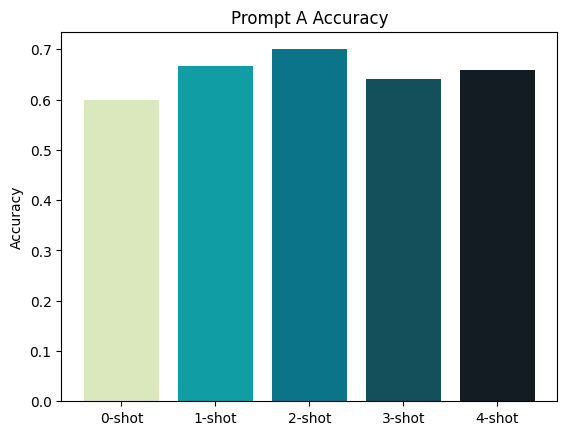

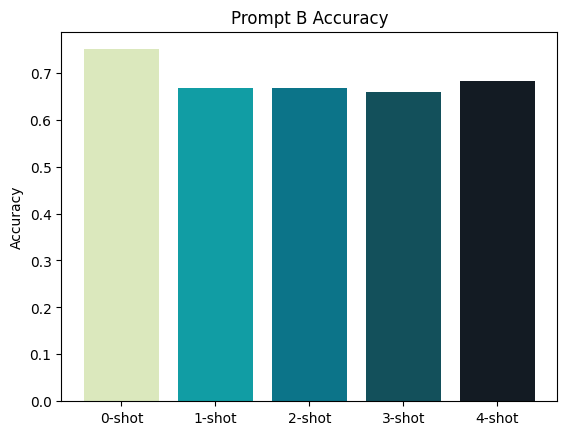

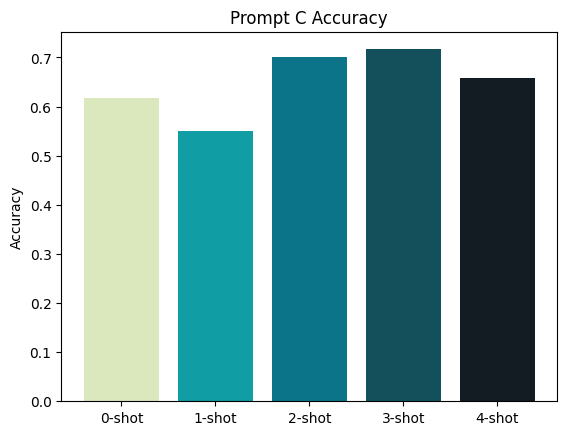

In [8]:
import matplotlib.pyplot as plt

def plot_accuracy(result, which, colors):
    methods = []
    accuracies = []

    for i in shots:
        method = f"{i}-shot"
        methods.append(method)
        key = f"{i}_shot"
        accuracies.append(result[key]['accuracy'])

    fig, ax = plt.subplots()
    ax.bar(methods, accuracies, color=colors)
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Prompt {which} Accuracy')
    plt.show()



colors = ['#dbe8bd', '#119DA4', '#0C7489', '#13505B', '#131B23']

plot_accuracy(resultA, 'A', colors)
plot_accuracy(resultB, 'B', colors)
plot_accuracy(resultC, 'C', colors)